# Part 1: Exploration & Visualizations

## Imports

In [1]:
# Standard Imports
import warnings
import pandas             as pd
import numpy              as np

# Custom modules
import graphs
import stat_functions

# Appearance
from IPython.core.display import display, HTML

# Notebook preferences
display(HTML("<style>.container { width:95% !important; }</style>"))
warnings.filterwarnings("ignore")
%matplotlib inline

## Table Of Contents

- [Exploration](#Exploration)
    - [Reading In The Data](#Reading-In-The-Data)
    - [Overview](#Overview)
- [Data Cleaning](#Data-Cleaning)
    - [Column Dropping](#Column-Dropping)
    - [Column Renaming](#Column-Renaming)
- [Visualizations](#Visualizations)
    - [Bar Plots](#Bar-Plots)
    - [Violin Plots](#Violin-Plots)
- [Statistics](#Statistics)

## Exploration

### Reading In The Data

In [2]:
phys_data = pd.read_csv("../Data/training.csv")

### Overview

In [3]:
# First five rows

phys_data.head()

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,...,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon
0,18453471,0.001578,0.999999,14.033335,0.681401,0.016039,0.451886,1.900433,1482.037476,0.066667,...,12290.760742,39264.398438,3.076006,4.003800,4.031514,458,-99,0,1866.300049,0.277559
1,5364094,0.000988,0.999705,5.536157,0.302341,0.142163,9.564503,0.865666,3050.720703,0.024022,...,16562.667969,7341.257812,3.228553,2.786543,2.975564,406,-99,0,1727.095947,0.225924
2,11130990,0.000877,0.999984,6.117302,0.276463,0.034746,1.970751,10.975849,3895.908691,0.055044,...,22695.388672,10225.309570,3.536903,2.865686,3.052810,196,-99,0,1898.588013,0.368630
3,15173787,0.000854,0.999903,5.228067,0.220739,0.076389,4.271331,3.276358,4010.781738,0.053779,...,16909.515625,9141.426758,3.087461,3.218034,2.375592,137,-99,0,1840.410034,0.246045
4,1102544,0.001129,0.999995,39.069534,1.898197,0.120936,4.984982,0.468348,4144.546875,0.004491,...,97612.804688,47118.785156,4.632295,4.711155,4.296878,477,-99,0,1899.793945,0.222060


In [4]:
# Shape of the data

print(f"The data has {phys_data.shape[0]} rows and {phys_data.shape[1]} columns.")

The data has 67553 rows and 51 columns.


In [5]:
# Checking for null values

phys_data.isnull().sum()

id                     0
LifeTime               0
dira                   0
FlightDistance         0
FlightDistanceError    0
IP                     0
IPSig                  0
VertexChi2             0
pt                     0
DOCAone                0
DOCAtwo                0
DOCAthree              0
IP_p0p2                0
IP_p1p2                0
isolationa             0
isolationb             0
isolationc             0
isolationd             0
isolatione             0
isolationf             0
iso                    0
CDF1                   0
CDF2                   0
CDF3                   0
ISO_SumBDT             0
p0_IsoBDT              0
p1_IsoBDT              0
p2_IsoBDT              0
p0_track_Chi2Dof       0
p1_track_Chi2Dof       0
p2_track_Chi2Dof       0
p0_IP                  0
p1_IP                  0
p2_IP                  0
p0_IPSig               0
p1_IPSig               0
p2_IPSig               0
p0_pt                  0
p1_pt                  0
p2_pt                  0


In [6]:
# Checking for data types

phys_data.dtypes

id                       int64
LifeTime               float64
dira                   float64
FlightDistance         float64
FlightDistanceError    float64
IP                     float64
IPSig                  float64
VertexChi2             float64
pt                     float64
DOCAone                float64
DOCAtwo                float64
DOCAthree              float64
IP_p0p2                float64
IP_p1p2                float64
isolationa               int64
isolationb               int64
isolationc               int64
isolationd             float64
isolatione             float64
isolationf             float64
iso                    float64
CDF1                   float64
CDF2                   float64
CDF3                   float64
ISO_SumBDT             float64
p0_IsoBDT              float64
p1_IsoBDT              float64
p2_IsoBDT              float64
p0_track_Chi2Dof       float64
p1_track_Chi2Dof       float64
p2_track_Chi2Dof       float64
p0_IP                  float64
p1_IP   

In [7]:
# Dataframe information

phys_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67553 entries, 0 to 67552
Data columns (total 51 columns):
id                     67553 non-null int64
LifeTime               67553 non-null float64
dira                   67553 non-null float64
FlightDistance         67553 non-null float64
FlightDistanceError    67553 non-null float64
IP                     67553 non-null float64
IPSig                  67553 non-null float64
VertexChi2             67553 non-null float64
pt                     67553 non-null float64
DOCAone                67553 non-null float64
DOCAtwo                67553 non-null float64
DOCAthree              67553 non-null float64
IP_p0p2                67553 non-null float64
IP_p1p2                67553 non-null float64
isolationa             67553 non-null int64
isolationb             67553 non-null int64
isolationc             67553 non-null int64
isolationd             67553 non-null float64
isolatione             67553 non-null float64
isolationf             67

In [8]:
# Description of the dataframe

phys_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,67553.0,9.410285e+06,5.420202e+06,9.400000e+01,4.703278e+06,9.439761e+06,1.411261e+07,1.877274e+07
LifeTime,67553.0,1.254584e-03,7.791074e-04,1.437305e-04,7.248604e-04,1.061224e-03,1.559167e-03,2.213438e-02
dira,67553.0,9.998460e-01,5.399247e-04,9.900895e-01,9.999157e-01,9.999855e-01,9.999974e-01,1.000000e+00
FlightDistance,67553.0,1.515399e+01,1.506072e+01,8.045098e-01,6.225103e+00,1.060448e+01,1.855425e+01,4.492426e+02
FlightDistanceError,67553.0,5.017945e-01,4.263454e-01,7.522420e-02,2.363521e-01,3.663182e-01,5.988169e-01,5.878616e+00
IP,67553.0,9.036296e-02,8.521629e-02,2.641485e-04,2.777275e-02,5.813586e-02,1.340103e-01,2.245918e+00
IPSig,67553.0,5.305426e+00,4.331420e+00,2.082329e-02,1.830687e+00,3.628297e+00,8.221298e+00,2.407413e+01
VertexChi2,67553.0,5.132504e+00,3.849261e+00,1.894900e-03,1.995162e+00,4.116704e+00,7.598480e+00,1.499864e+01
pt,67553.0,5.027967e+03,3.010766e+03,3.141001e+02,3.157042e+03,4.366348e+03,6.079196e+03,7.439029e+04
DOCAone,67553.0,4.496067e-02,6.052672e-02,9.142349e-08,1.298088e-02,2.912052e-02,5.754587e-02,8.312201e+00


[Top](#Table-Of-Contents)

## Data Cleaning

### Column Dropping

Not all of the columns in the training data are in the test data so we must remove them.

In [9]:
phys_data = phys_data.drop(columns = ["mass", "production", "min_ANNmuon"])
print(f"The data has {phys_data.shape[0]} rows and {phys_data.shape[1]} columns.")

The data has 67553 rows and 48 columns.


### Column Renaming

In [10]:
# Creating a dicitionary of new names

new_names = {"LifeTime"           : "life_time",
             "FlightDistance"     : "flight_distance",
             "FlightDistanceError": "flight_distance_error",
             "IP"                 : "ip",
             "IPSig"              : "ip_sig",
             "VertexChi2"         : "vertex_chi2",
             "DOCAone"            : "doca1",
             "DOCAtwo"            : "doca2",
             "DOCAthree"          : "doca3",
             "IP_p0p2"            : "ip_p0p2",
             "IP_p1p2"            : "ip_p1p2",
             "ISO_SumBDT"         : "iso_sum_bdt",
             "p0_IsoBDT"          : "p0_iso_bdt",
             "p1_IsoBDT"          : "p1_iso_bdt",
             "p2_IsoBDT"          : "p2_iso_bdt",
             "p0_track_Chi2Dof"   : "p0_track_chi2_dof",
             "p1_track_Chi2Dof"   : "p1_track_chi2_dof",
             "p2_track_Chi2Dof"   : "p2_track_chi2_dof",
             "p0_IPSig"           : "p0_ip_sig",
             "p1_IPSig"           : "p1_ip_sig",
             "p2_IPSig"           : "p2_ip_sig"}

In [11]:
# Renaming the columns

phys_data         = phys_data.rename(new_names, axis = 1)
phys_data.columns = phys_data.columns.str.lower()

[Top](#Table-Of-Contents)

## Visualizations

### Bar Plots

In [12]:
# Percentages of the targets

phys_data["signal"].value_counts(normalize = True)*100

1    61.690821
0    38.309179
Name: signal, dtype: float64

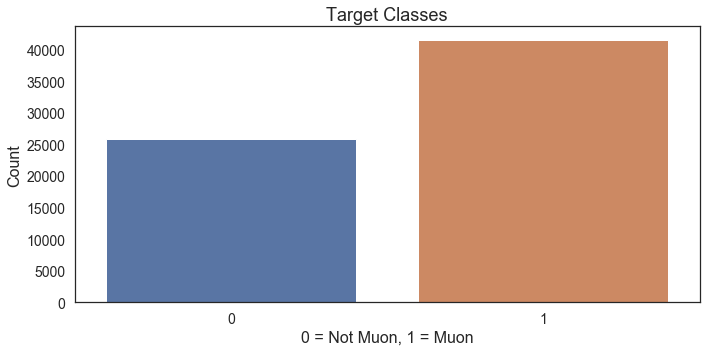

In [13]:
graphs.countplots(df = phys_data,
                  columns = ["signal"],
                  titles  = ["Target Classes"],
                  labels  = ["0 = Not Muon, 1 = Muon"],
                  ylabel  = "Count",
                  dim     = (10,5),
                  row     = 1,
                  col     = 1)

Unusually here, we have the majority of our data as the positive class: usually it is the other way around.

### Violin Plots

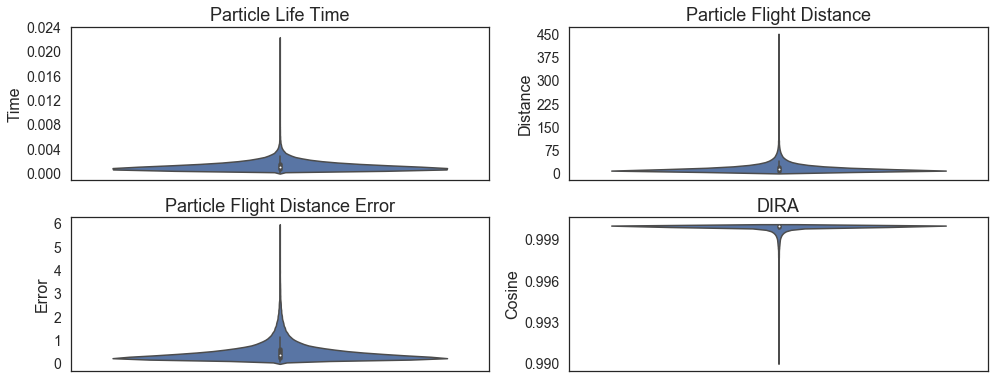

In [14]:
graphs.violinplots(df = phys_data,
                   columns = ["life_time", "flight_distance",
                              "flight_distance_error", "dira"],
                   titles  = ["Particle Life Time", "Particle Flight Distance",
                              "Particle Flight Distance Error", "DIRA"],
                   labels  = ["Time", "Distance", "Error", "Cosine"],
                   ticks   = [np.arange(0,0.028,0.004), np.arange(0,500,75),
                              np.arange(0,7.0,1), np.arange(0.99,1.0,0.003)],
                   dim     = (14,8),
                   row     = 3,
                   col     = 2)

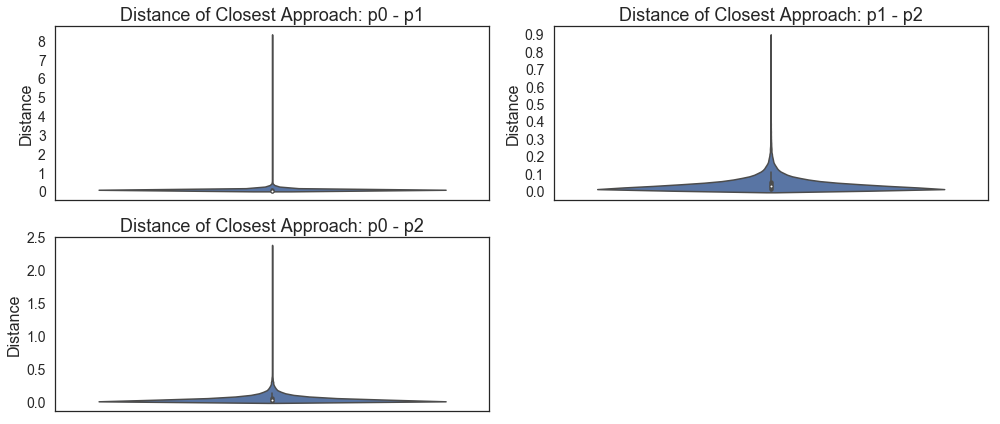

In [15]:
graphs.violinplots(df      = phys_data,
                   columns = ["doca1", "doca2", "doca3"],
                   titles  = ["Distance of Closest Approach: p0 - p1",
                              "Distance of Closest Approach: p1 - p2",
                              "Distance of Closest Approach: p0 - p2"],
                   labels  = ["Distance", "Distance", "Distance"],
                   ticks   = [np.arange(0,9,1), np.arange(0,1.0,0.1),
                              np.arange(0,3,0.5)],
                   dim     = (14,6),
                   row     = 2,
                   col     = 2)

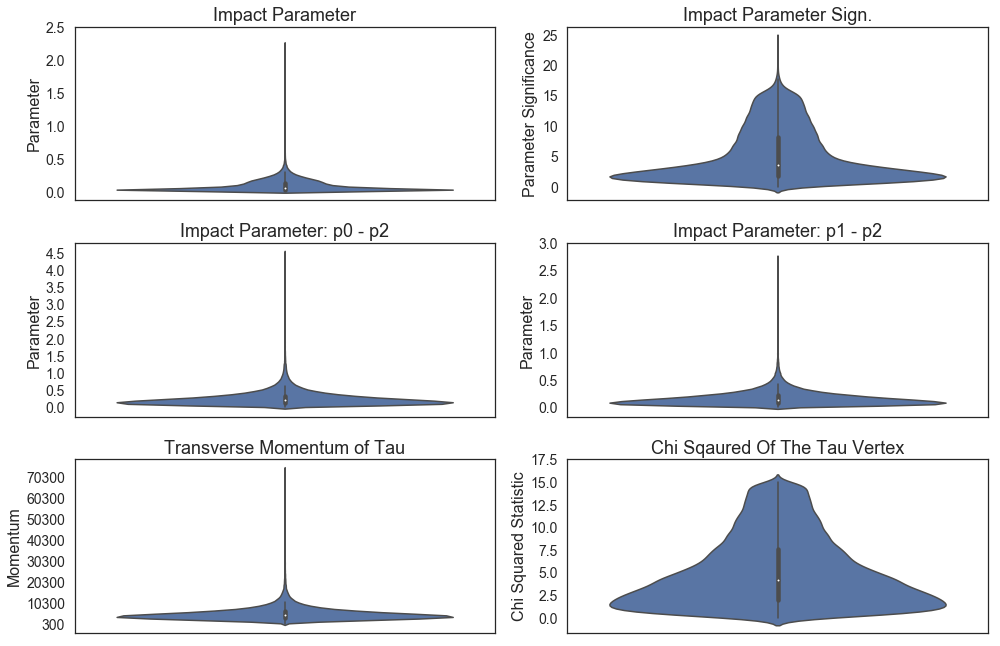

In [16]:
graphs.violinplots(df      = phys_data,
                   columns = ["ip", "ip_sig", "ip_p0p2",
                              "ip_p1p2", "pt", "vertex_chi2"],
                   titles  = ["Impact Parameter", "Impact Parameter Sign.",
                              "Impact Parameter: p0 - p2", "Impact Parameter: p1 - p2",
                              "Transverse Momentum of Tau", "Chi Sqaured Of The Tau Vertex"],
                   labels  = ["Parameter", "Parameter Significance", "Parameter", "Parameter",
                              "Momentum", "Chi Squared Statistic"],
                   ticks   = [np.arange(0,3,0.50), np.arange(0,30,5), np.arange(0,5,0.5),
                              np.arange(0,3.5,0.5), np.arange(300,75000,10000), np.arange(0,20,2.5)],
                   dim     = (14,12),
                   row     = 4,
                   col     = 2)

[Top](#Table-Of-Contents)

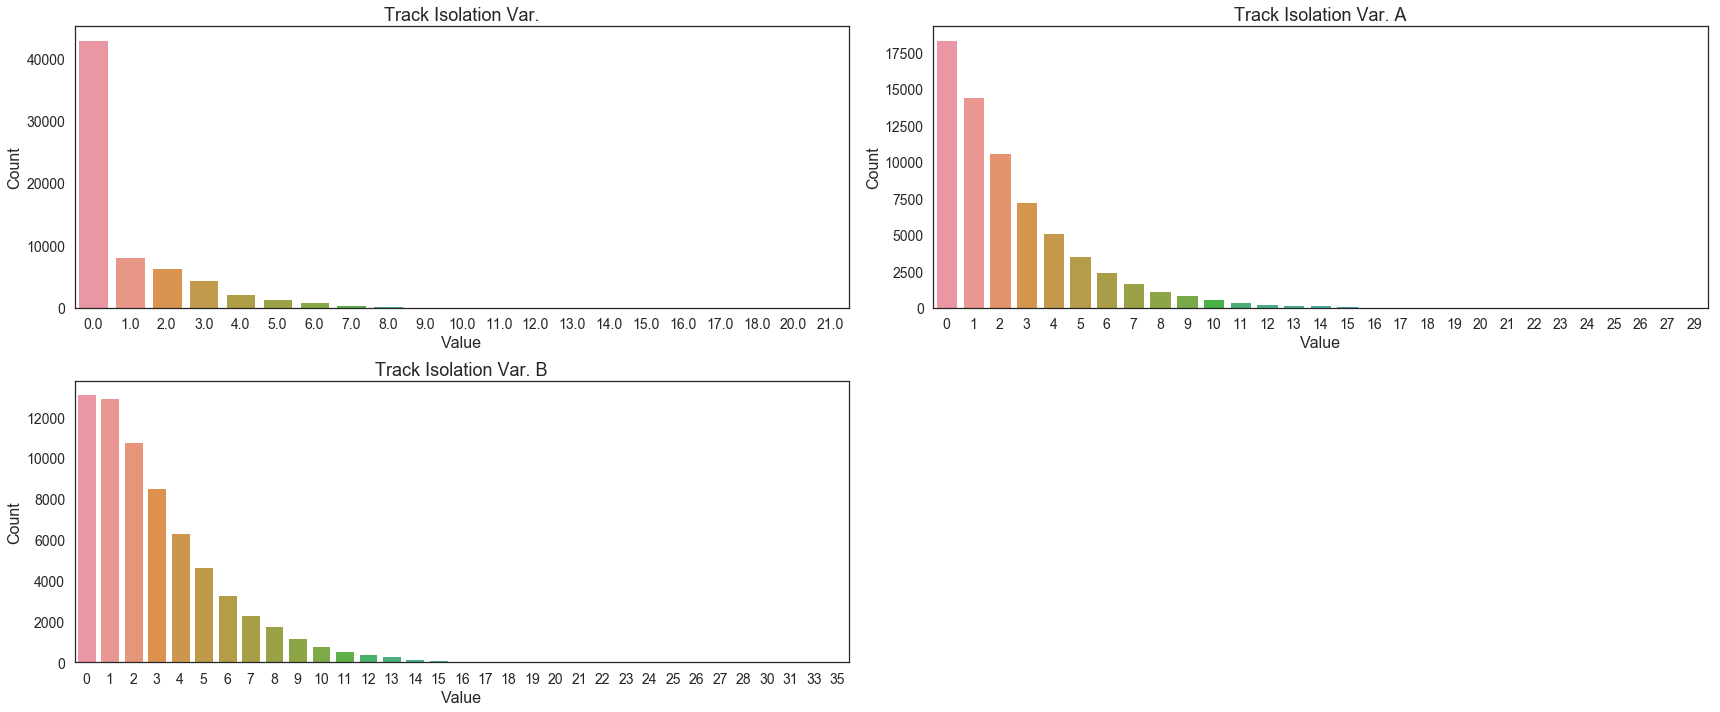

In [17]:
graphs.countplots(df      = phys_data,
                  columns = ["iso", "isolationa", "isolationb"],
                  titles  = ["Track Isolation Var.", "Track Isolation Var. A", 
                             "Track Isolation Var. B"],
                  labels  = ["Value", "Value", "Value"],
                  ylabel  = "Count",
                  dim     = (24,10),
                  row     = 2,
                  col     = 2)

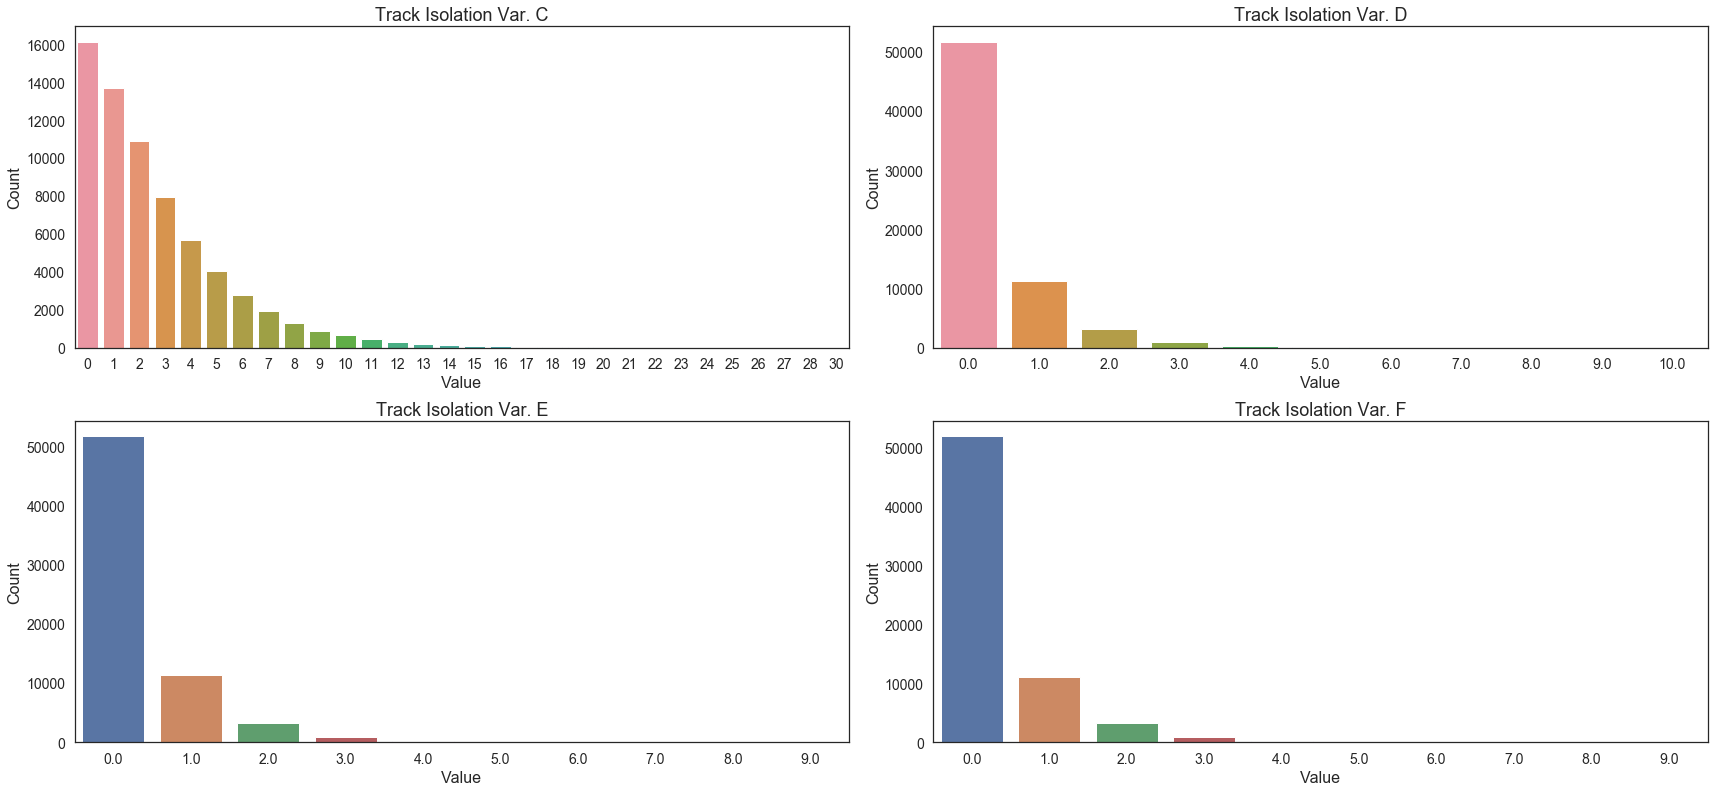

In [18]:
graphs.countplots(df      = phys_data,
                  columns = ["isolationc", "isolationd", "isolatione", "isolationf"],
                  titles  = ["Track Isolation Var. C", "Track Isolation Var. D", 
                             "Track Isolation Var. E", "Track Isolation Var. F"],
                  labels  = ["Value", "Value", "Value", "Value"],
                  ylabel  = "Count",
                  dim     = (24,16),
                  row     = 3,
                  col     = 2)

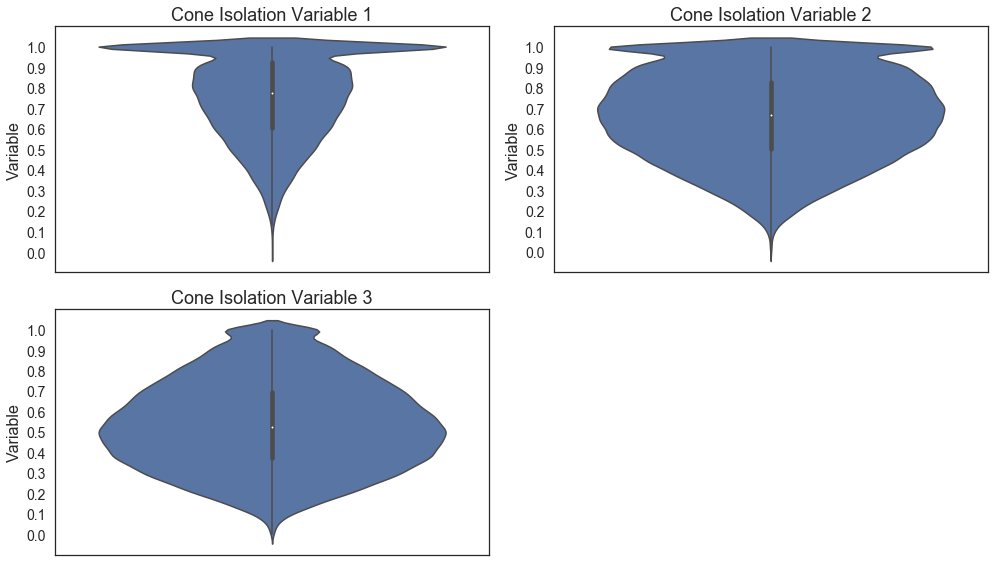

In [19]:
graphs.violinplots(df      = phys_data,
                   columns = ["cdf1", "cdf2", "cdf3"],
                   titles  = ["Cone Isolation Variable 1", 
                              "Cone Isolation Variable 2",
                              "Cone Isolation Variable 3"],
                   labels  = ["Variable", "Variable", "Variable"],
                   ticks   = [np.arange(0,1.1,.1), np.arange(0,1.1,.1),
                              np.arange(0,1.1,.1)],
                   dim     = (14,8),
                   row     = 2,
                   col     = 2)

[Top](#Table-Of-Contents)

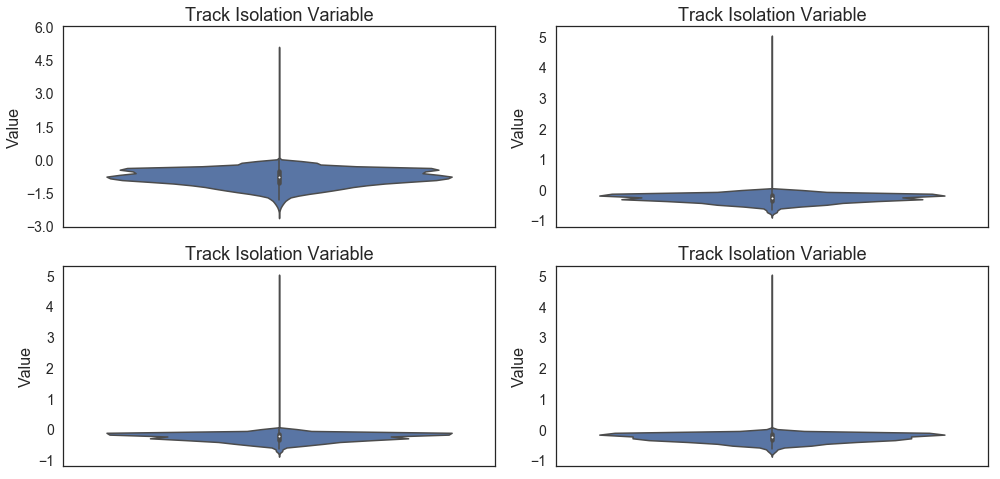

In [20]:
graphs.violinplots(df      = phys_data,
                   columns = ["iso_sum_bdt", "p0_iso_bdt", 
                              "p1_iso_bdt", "p2_iso_bdt"],
                   titles  = ["Track Isolation Variable", "Track Isolation Variable",
                              "Track Isolation Variable", "Track Isolation Variable"],
                   labels  = ["Value", "Value", "Value", "Value"],
                   ticks   = [np.arange(-3,6.5,1.5), np.arange(-1,6,1),
                              np.arange(-1,6,1), np.arange(-1,6,1)],
                   dim     = (14,10),
                   row     = 3,
                   col     = 2)

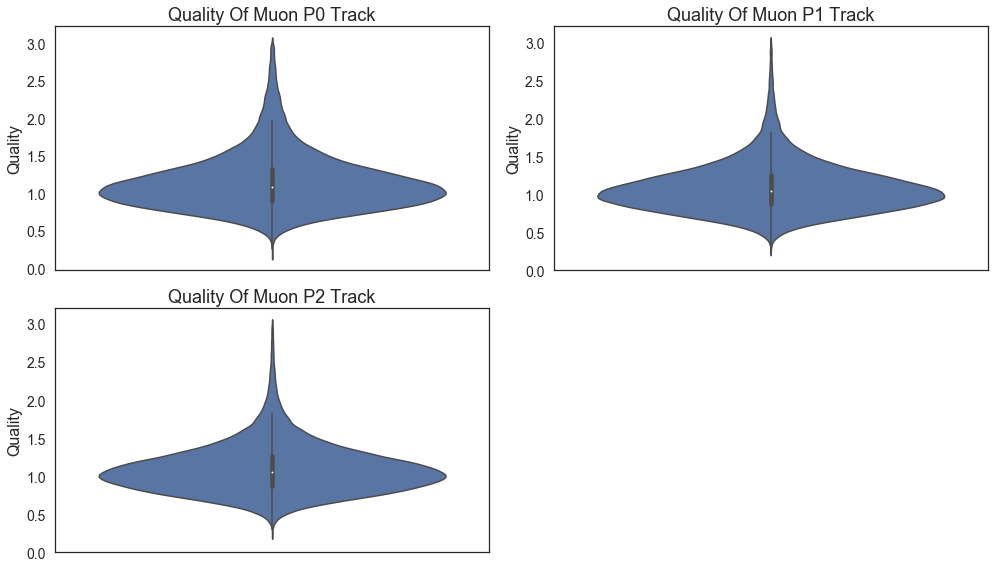

In [24]:
graphs.violinplots(df      = phys_data,
                   columns = ["p0_track_chi2_dof", "p1_track_chi2_dof", 
                              "p2_track_chi2_dof"],
                   titles  = ["Quality Of Muon P0 Track", "Quality Of Muon P1 Track",
                              "Quality Of Muon P2 Track"],
                   labels  = ["Quality", "Quality", "Quality"],
                   ticks   = [np.arange(0,3.25,0.5), np.arange(0,3.25,0.5),
                              np.arange(0,3.25,0.5)],
                   dim     = (14,8),
                   row     = 2,
                   col     = 2)

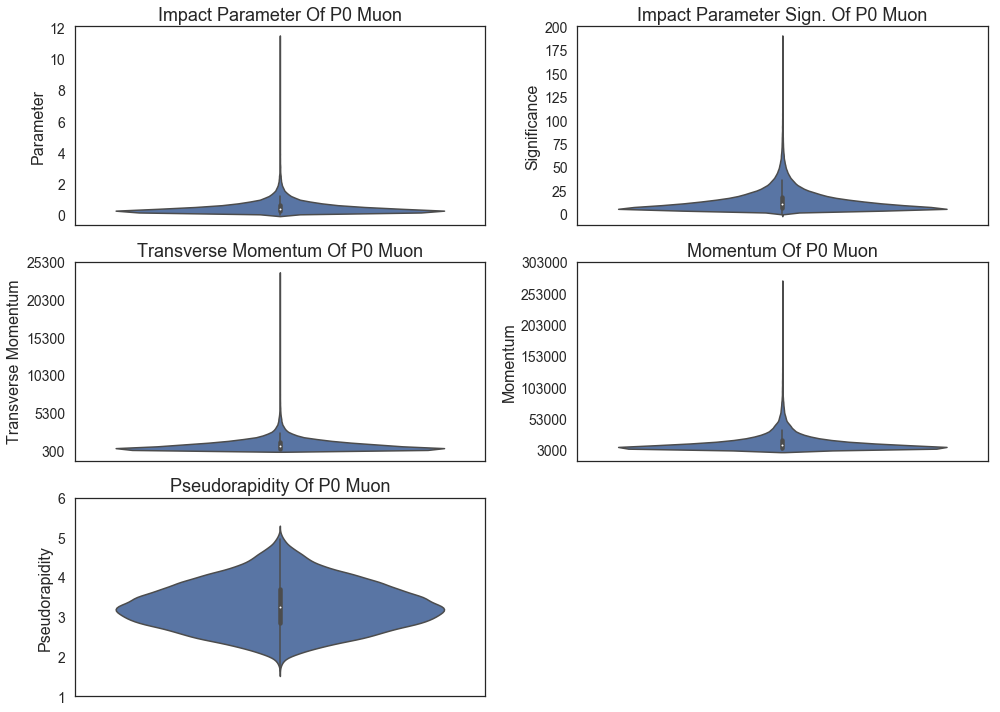

In [42]:
graphs.violinplots(df      = phys_data,
                   columns = ["p0_ip", "p0_ip_sig", "p0_pt", 
                              "p0_p", "p0_eta"],
                   titles  = ["Impact Parameter Of P0 Muon", 
                              "Impact Parameter Sign. Of P0 Muon",
                              "Transverse Momentum Of P0 Muon",
                              "Momentum Of P0 Muon", "Pseudorapidity Of P0 Muon"],
                   labels  = ["Parameter", "Significance", "Transverse Momentum",
                              "Momentum", "Pseudorapidity"],
                   ticks   = [np.arange(0,14,2), np.arange(0,225,25), np.arange(300,30000,5000),
                              np.arange(3000,350000,50000), np.arange(1,7,1)],
                   dim     = (14,10),
                   row     = 3,
                   col     = 2)

[Top](#Table-Of-Contents)

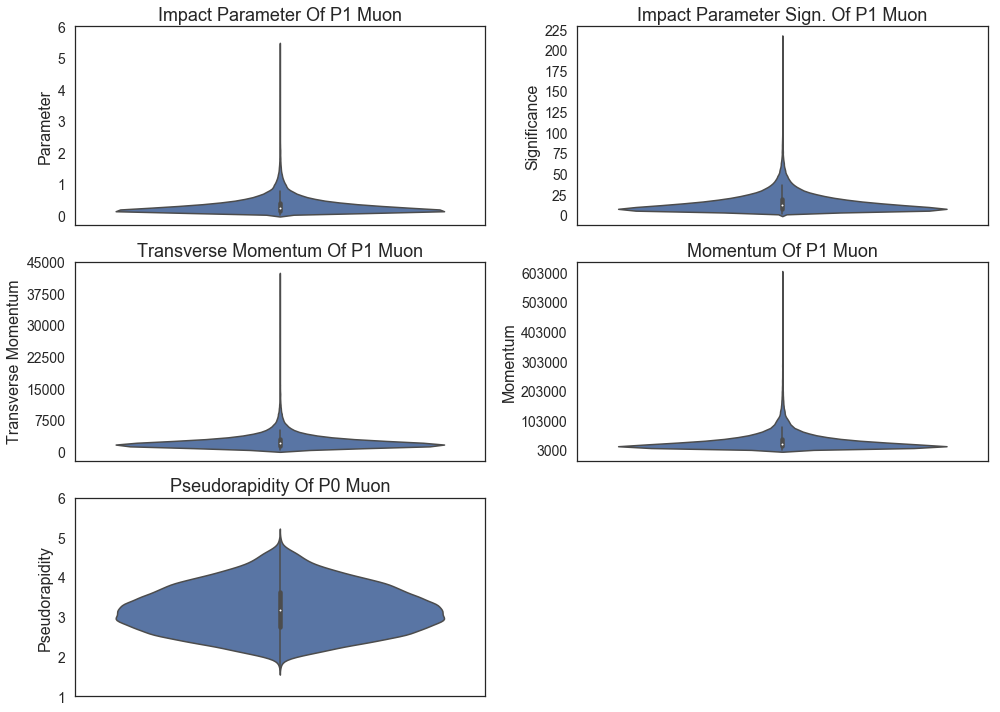

In [64]:
graphs.violinplots(df      = phys_data,
                   columns = ["p1_ip", "p1_ip_sig", "p1_pt", 
                              "p1_p", "p1_eta"],
                   titles  = ["Impact Parameter Of P1 Muon", 
                              "Impact Parameter Sign. Of P1 Muon",
                              "Transverse Momentum Of P1 Muon",
                              "Momentum Of P1 Muon", "Pseudorapidity Of P0 Muon"],
                   labels  = ["Parameter", "Significance", "Transverse Momentum",
                              "Momentum", "Pseudorapidity"],
                   ticks   = [np.arange(0,7,1), np.arange(0,250,25), np.arange(0,50000,7500),
                              np.arange(3000,700000,100000), np.arange(1,7,1)],
                   dim     = (14,10),
                   row     = 3,
                   col     = 2)

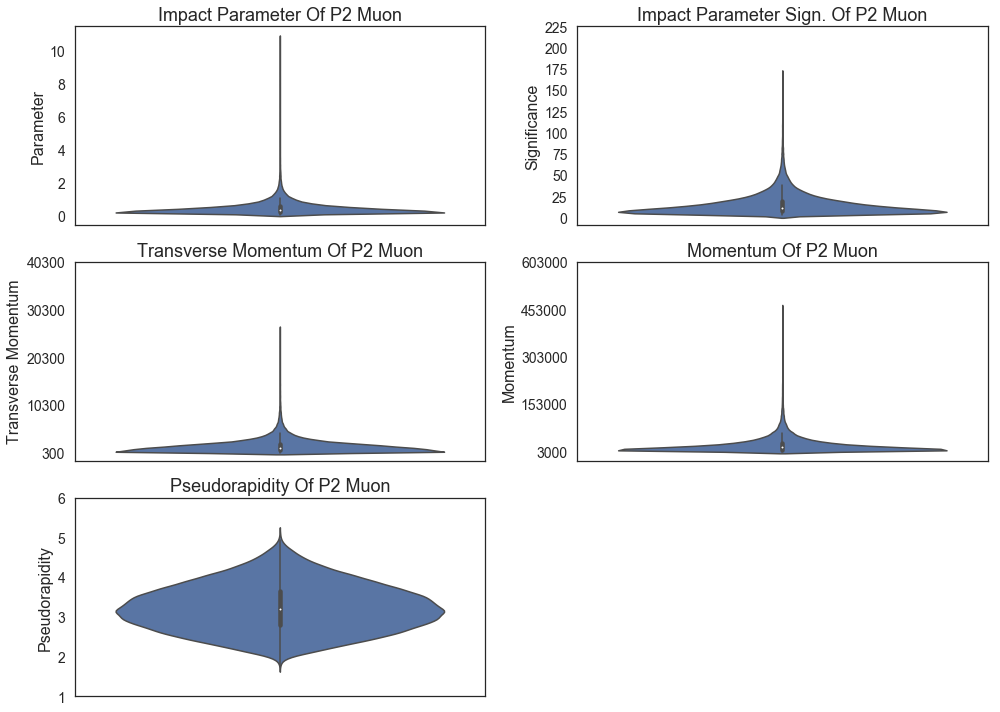

In [76]:
graphs.violinplots(df      = phys_data,
                   columns = ["p2_ip", "p2_ip_sig", "p2_pt", 
                              "p2_p", "p2_eta"],
                   titles  = ["Impact Parameter Of P2 Muon", 
                              "Impact Parameter Sign. Of P2 Muon",
                              "Transverse Momentum Of P2 Muon",
                              "Momentum Of P2 Muon", "Pseudorapidity Of P2 Muon"],
                   labels  = ["Parameter", "Significance", "Transverse Momentum",
                              "Momentum", "Pseudorapidity"],
                   ticks   = [np.arange(0,12,2), np.arange(0,250,25), np.arange(300,45000,10000),
                              np.arange(3000,650000,150000), np.arange(1,7,1)],
                   dim     = (14,10),
                   row     = 3,
                   col     = 2)

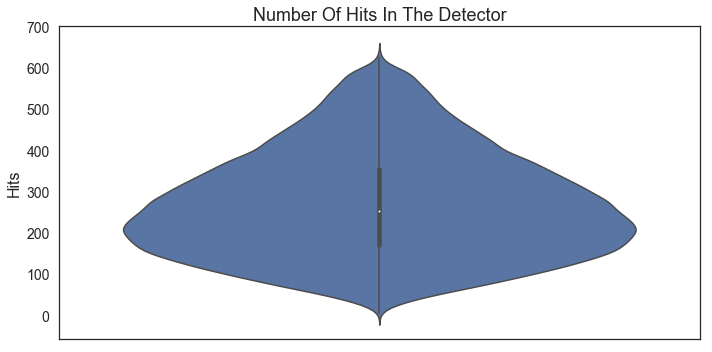

In [80]:
graphs.violinplots(df      = phys_data,
                   columns = ["spdhits"],
                   titles  = ["Number Of Hits In The Detector"],
                   labels  = ["Hits"],
                   ticks   = [np.arange(0,750,100)],
                   dim     = (10,5),
                   row     = 1,
                   col     = 1)

[Top](#Table-Of-Contents)